In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [7]:
print(pd.isnull(df).sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
pd.unique(df['species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [10]:
df.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [11]:
df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


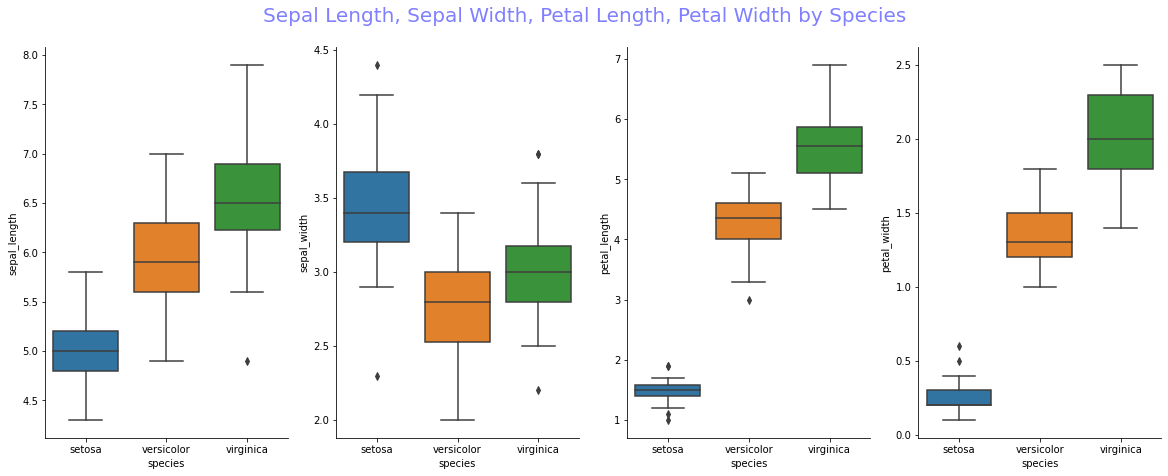

In [12]:
figure,axes = plt.subplots(1,4,figsize = (20,7))
sns.boxplot(data = df, x = 'species', y = 'sepal_length',ax=axes[0])
sns.boxplot(data = df, x = 'species', y = 'sepal_width',ax=axes[1])
sns.boxplot(data = df, x = 'species', y = 'petal_length',ax=axes[2])
sns.boxplot(data = df, x = 'species', y = 'petal_width',ax=axes[3])
sns.despine()
plt.subplots_adjust(top=0.9)
plt.suptitle('Sepal Length, Sepal Width, Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
plt.show()

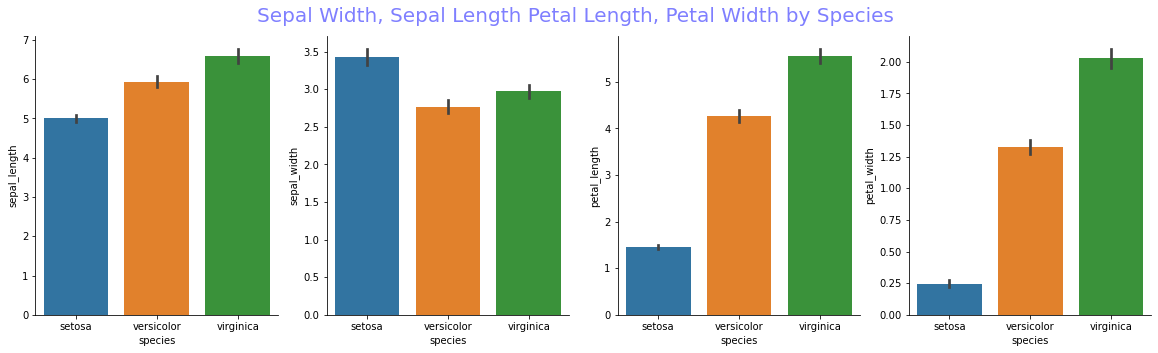

In [13]:
figure,axes = plt.subplots(1,4,figsize = (20,5))
sns.barplot(data = df, x = 'species', y = 'sepal_length',ax=axes[0])
sns.barplot(data = df, x = 'species', y = 'sepal_width',ax=axes[1])
sns.barplot(data = df, x = 'species', y = 'petal_length',ax=axes[2])
sns.barplot(data = df, x = 'species', y = 'petal_width',ax=axes[3])
sns.despine()
plt.subplots_adjust(top=0.9)
plt.suptitle('Sepal Width, Sepal Length Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
plt.show()

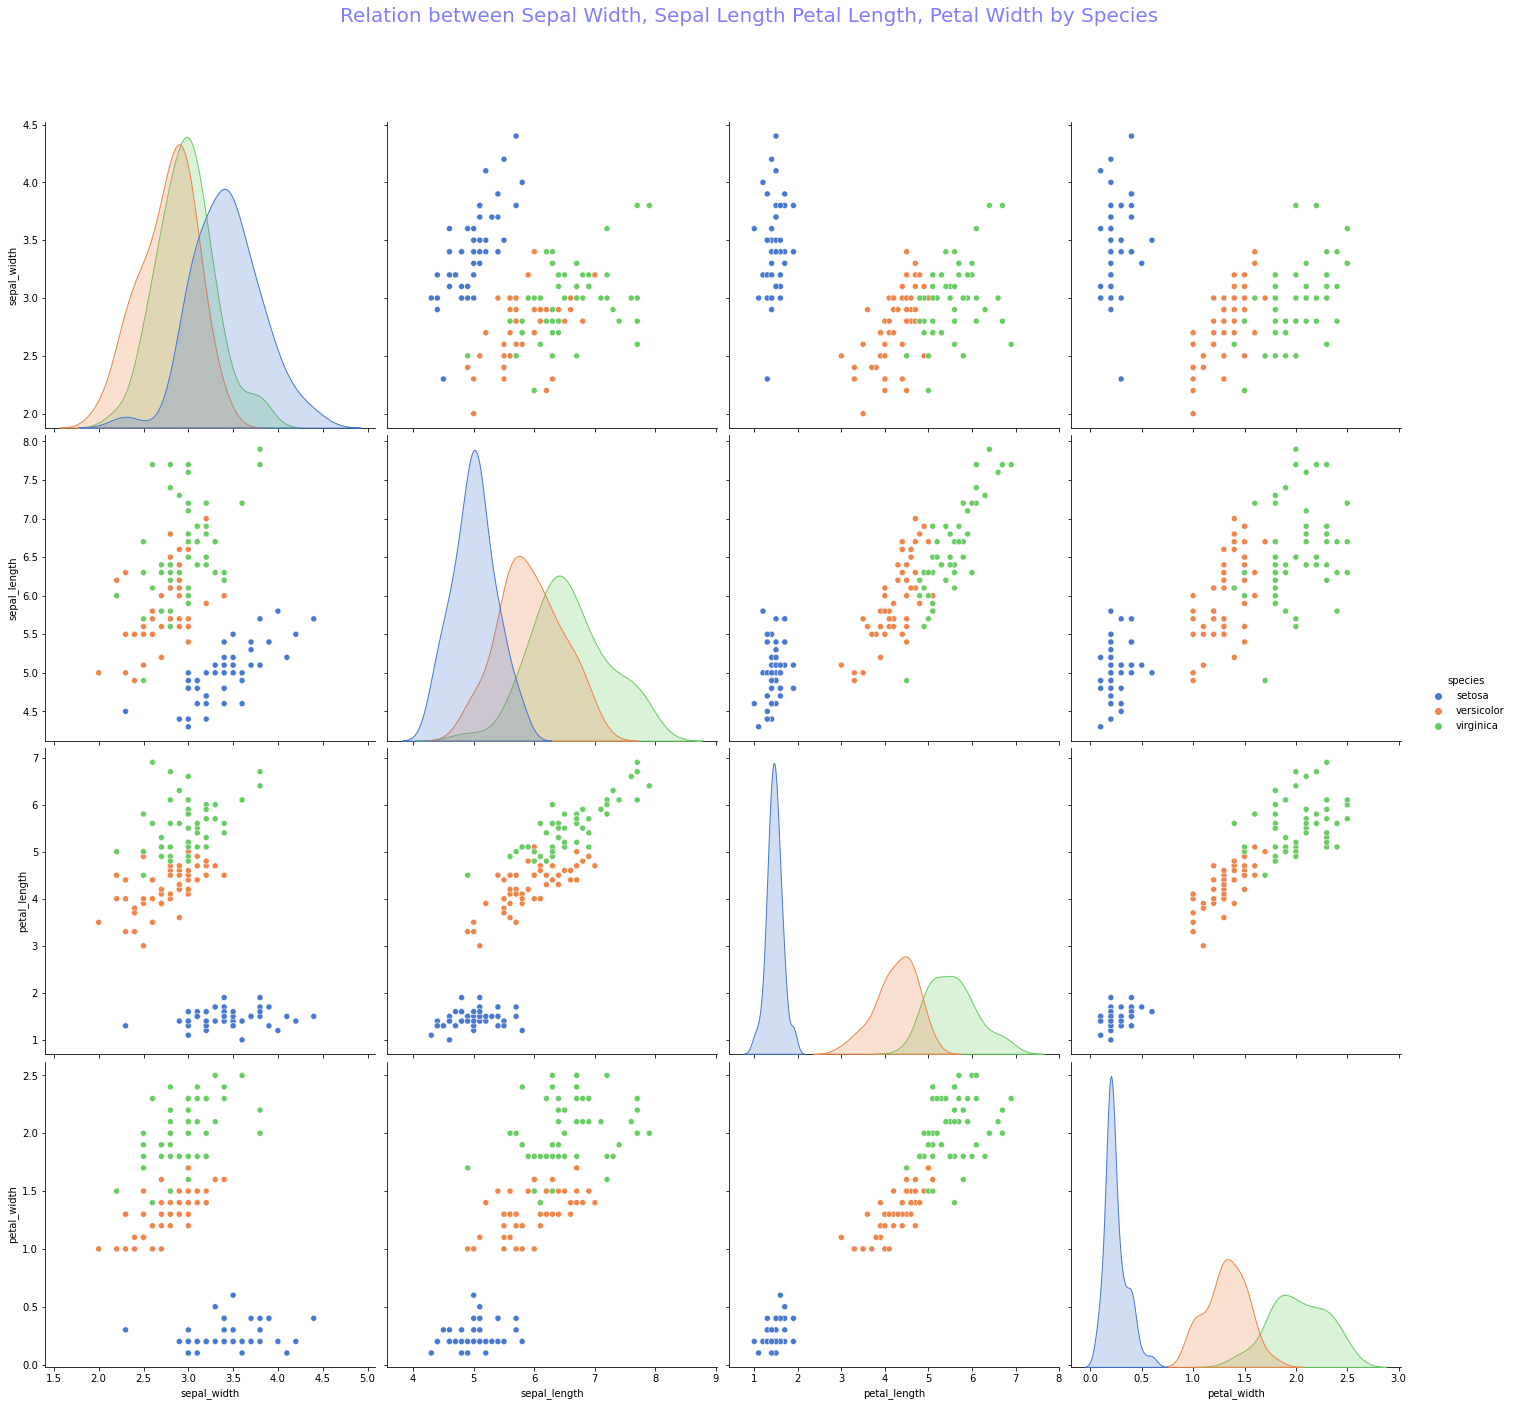

In [14]:
#create a pairplot(plot across different attributes)
#size decides the size of the graph
#palette decides the colour
sns.pairplot(df,hue='species',palette="muted",height=5,vars=['sepal_width','sepal_length','petal_length','petal_width'],kind='scatter')

#to change the size of scatterpoints
#a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#remove the top and the right lines
sns.despine()

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#set the title of the graph
plt.suptitle('Relation between Sepal Width, Sepal Length Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# encoder = LabelEncoder()

# target = encoder.fit_transform(df['species'])
predictors = df.drop(['species'], axis=1)
target = df['species']
# target = pd.get_dummies(drop_first=True)





In [16]:
# species_mapping = {"setosa": 1, "versicolor": 2, "virginica": 3}
# for dataset in df:
#     dataset['species'] = dataset['species'].map(species_mapping)
#     dataset['species'] = dataset['species'].fillna(0)
# Creating dummy variables for categorical datatypes
# target = pd.get_dummies(target, columns=['setosa', 'versicolor', 'virginica'])
# target.sample(5)

# iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# le=LabelEncoder()
# iris['species']=le.fit_transform(iris['species'])



# #map each of the title groups to a numerical value
# species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
# iris['species'] = iris['species'].map(species_mapping)

# iris.head()


target.sample(5)

111     virginica
87     versicolor
66     versicolor
70     versicolor
15         setosa
Name: species, dtype: object

In [17]:
target.shape

(150,)

In [18]:
target.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [19]:
# target.replace({"setosa":1, "versicolor":2, "virginica":3}, inplace=True)

In [20]:
# map each of the title groups to a numerical value
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
target = target.map(species_mapping)

target.sample(5)
target.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [21]:
predictors.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
predictors.shape

(150, 4)

In [23]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [24]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((117, 4), (33, 4), (117,), (33,))

In [25]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, auc, mean_squared_error, recall_score, precision_score, r2_score

In [44]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_gaussian}, r2 = {r2}, recall = {recall}, \nprecision = {precision}')
 

Accuracy 96.97, r2 = 0.9451827242524917, recall = 0.9696969696969697, 
precision = 0.9717171717171716


In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
log_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_logreg}, r2-score {log_r2}, recall = {recall}, \nprecision = {precision}')

Accuracy 100.0, r2-score 1.0, recall = 1.0, 
precision = 1.0


In [48]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
svc_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_svc}, r2-score {svc_r2}, recall = {recall}, precision = {precision}')

Accuracy 100.0, r2-score 1.0, recall = 1.0, precision = 1.0


In [49]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
SVC_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_linear_svc}, r2-score {SVC_r2}, recall = {recall}, precision = {precision}')

Accuracy 93.94, r2-score 0.8903654485049834, recall = 0.9393939393939394, precision = 0.9528619528619529


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [50]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
Per_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_perceptron}, r2-score {Per_r2}, recall = {recall}, precision = {precision}')

Accuracy 57.58, r2-score 0.2325581395348837, recall = 0.5757575757575758, precision = 0.33820816864295117


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
DT_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_decisiontree}, r2-score {DT_r2}, recall = {recall}, precision = {precision}')

Accuracy 100.0, r2-score 1.0,  
recall = 1.0, 
precision = 1.0


In [51]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
RF_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_randomforest}, r2-score {RF_r2},  recall = {recall}, precision = {precision}')

Accuracy 100.0, r2-score 1.0,  recall = 1.0, 
precision = 1.0


In [52]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
KNN_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_knn}, r2-score {KNN_r2},  recall = {recall}, precision = {precision}')

Accuracy 96.97, r2-score 0.9451827242524917,  recall = 0.9696969696969697, 
precision = 0.9734848484848485


In [53]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
SGD_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_sgd}, r2-score {SGD_r2},  recall = {recall}, precision = {precision}')

Accuracy 84.85, r2-score 0.7259136212624584,  recall = 0.8484848484848485, 
precision = 0.8883572567783095


In [54]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
GBC_r2 = r2_score(y_val, y_pred)
recall = recall_score(y_val,y_pred, average='weighted')
precision = precision_score(y_val,y_pred, average='weighted')
print(f'Accuracy {acc_gbk}, r2-score {GBC_r2},  recall = {recall}, precision = {precision}')

Accuracy 100.0, r2-score 1.0,  recall = 1.0, precision = 1.0


In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.00
2,Logistic Regression,100.00
3,Random Forest,100.00
7,Decision Tree,100.00
9,Gradient Boosting Classifier,100.00
1,KNN,96.97
4,Naive Bayes,96.97
6,Linear SVC,93.94
8,Stochastic Gradient Descent,84.85
5,Perceptron,57.58


In [56]:
#set ids as species and predict species 
ids = df['species']
predictions = gbk.predict(df.drop('species', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'species' : ids, 'species': predictions })
output.to_csv('submission.csv', index=False)